# Mediods Analysis

This experiment has the purpose of analysing the medoid of some of the clusters defined in the previous experiment. According to it, the best number of cluster is ?? regarding the square of the 2-norm distance, ?? regarding the silhoutte score and ?? regarding the davies-bouldin score. Therefore, the number of clusters that we will use in the present experiment is ??.


In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

In [2]:
%matplotlib notebook
import numpy as np
import sklearn
print(sklearn.__version__)
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances

0.20.0


In [3]:
X = r.readBOW()
npX = X.values
print(npX)
print(X.head(10))
print(X.shape)

['word2vec.csv', 'health.txt', 'bags.csv']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.55220061 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9   ...    0.1185  0.1186  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [4]:
news = r.readNews()
print(news.head(10))

['word2vec.csv', 'health.txt', 'bags.csv']
                   id                    publish_date  \
0  576880531301801984  Sat Mar 14 23:00:11 +0000 2015   
1  576820122666471424  Sat Mar 14 19:00:08 +0000 2015   
2  576744652717461504  Sat Mar 14 14:00:15 +0000 2015   
3  576736754436304896  Sat Mar 14 13:28:52 +0000 2015   
4  576736614766010368  Sat Mar 14 13:28:18 +0000 2015   
5  576548368740052992  Sat Mar 14 01:00:17 +0000 2015   
6  576518190286536704  Fri Mar 13 23:00:22 +0000 2015   
7  576494177971732480  Fri Mar 13 21:24:57 +0000 2015   
8  576472874946433024  Fri Mar 13 20:00:18 +0000 2015   
9  576464606551490560  Fri Mar 13 19:27:27 +0000 2015   

                                       headline_test  
0  An abundance of online info can turn us into e...  
1  A plant-based diet that incorporates fish may ...  
2  It doesn't take much to damage your hearing at...  
3  RT @CNN: Forever young? Discover this island’s...  
4  RT @CNN: Is post-traumatic stress disorder in ...  

In [5]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = X.size
tsne_bow = TSNE(n_components=2, perplexity=10, verbose=True, n_jobs=-1)#500
tsne_bow_result = tsne_bow.fit_transform(X)

## Computing the Medoids
In here, we compute the medoids as the closest point to the centroids of the clusters.

In [6]:
best_K = 62
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_clusters=best_K, n_jobs=-1)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")    

#############################
Best K = 62
Applying K-means
Finished
#############################


In [7]:
y_pred = best_cluster.labels_
arrays=[]
for i in range(best_K):
    dist = np.linalg.norm(best_cluster.cluster_centers_[i]-npX[y_pred==i],axis=1)
    index = np.argmin(dist)
    arrays.append(npX[y_pred==i][index])   

medoids = np.vstack(arrays)
print(medoids.shape)
print(medoids)

(62, 1203)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
l = []
for i in range(best_K):
    l.append(np.where(np.all(npX==medoids[i],axis=1))[0][0]) # these last [0][0] return the index, since the output of this command is (array([id]),)
    
index = np.array(l)
print(index)
print(len(np.unique(index)))

[ 9366  6109 10177  2970  7553   890 12398   568   679   804  3690  3270
  9450  3585   778   775  3092 12938  5874  2943  5434 12316  8890  4339
  9419  4613  5752   816  6776  2086 10223  4386  6448  3231 12807 10139
  5084  2298  6851  6777   882  6518 12323  2659  5989  3356    98 12458
  2706 12216 10247  4722  2277 12138 10718  6088  2797  2189 10132  6937
  9818  9978]
62


## Selecting medoids neighbors
Here the medoids neighbors are selected in order to plot them and see if the clusters make sense.

In [21]:
nm = 5 #number of medoids to be analyzed
nnp = 5 #number of neighbor points of the medoids
np.random.seed(42)
r = np.random.randint(0,61,nm)
selected_medoids = medoids[r]
print("Random indexes:",r)
points_per_medoid = []

for i in range(nm):
    p = selected_medoids[i]
    aux = npX[y_pred==r[i]]
    d = np.linalg.norm(aux-p,axis=1)
    points = []
    points.append(index[r[i]])
    
    for j in range(nnp):
        min_d = d.argmin()
        while (d[min_d] == 0.):
            d[min_d] = np.inf
            min_d = d.argmin()
        points = points + (np.where(np.all(npX==aux[min_d],axis=1))[0]).tolist()
        d[min_d] = np.inf
        
    points_per_medoid.append(np.unique(points).tolist())

    
print("Points:",points_per_medoid)
print(len(points_per_medoid))

Random indexes: [38 51 28 14 42]
Points: [[6151, 6519, 6851, 7502, 7856, 8665], [2484, 4195, 4608, 4722, 5116, 5425], [1471, 3155, 6776, 7923, 8105, 13015], [776, 778, 1174, 1176, 1184, 1185, 1186, 1691, 2374], [4512, 9409, 10088, 11417, 11991, 12323]]
5


### News of the medoids and their neighbors

In [24]:
for p in points_per_medoid:
    info = np.take(news,p,0).loc[:,"headline_test"].values
    print("----------------------------")
    for i in range(info.size):
        print(info[i],"\n")
print("----------------------------")

----------------------------
RT @RMichlerMD: This is why weight reduction surgery can imprv cholesterol, diabetes, &amp; high BP before 1lb of weight is even lost #WLS #healthtalk 

4 hangover cures put to the test: 

RT @caloriecount: @EverydayHealth A5: Always keep non-perishable healthy snacks in ur pantry -beans, nut/nut butter, seeds,bean soup, whole grains #healthtalk 

And remember to include the hashtag #HealthTalk in all your tweets. Let’s get started! 

RT @sarahstanley: Motivation also starts in your head. If you think you can, you will. If you think you can’t, you won’t. #healthtalk 

RT @Robinsbite: @CSPI A7: as my 3 yr old says "save this for later" when talking about to-go containers! Smart kid! #healthtalk 

----------------------------
Adult prescription drug use leads to increased poisonings in kids 

Woman's car window plea gets her a kidney donor 

Genes almost wholly responsible for #autism, study finds 

Injured Boston Marathon couple separating 

Gates Foundation

### News of the medoids and their neighbors (Plot)

<IPython.core.display.Javascript object>


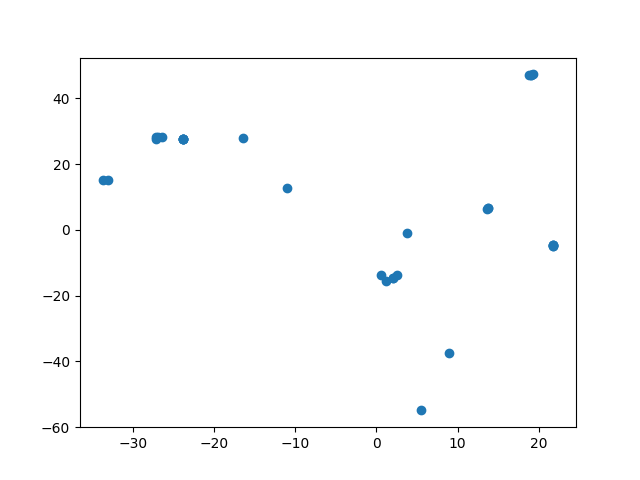

In [15]:
true_label = np.zeros((npX.shape[0],1))
np.put(true_label,index,1)
info = np.take(news,points,0).loc[:,"headline_test"]

plot = v.visualize_sup_scatter_hover(tsne_bow_result[points], true_label[points], info.values)
plot.show()

## Medoids Headlines
After the medoids are computed, the headlines of the news represented by those medoids are shown bellow.

In [11]:
np.take(news,index,0)

,id,publish_date,headline_test
9366,580990290644729858,Thu Mar 26 07:10:54 +0000 2015,VIDEO: 'Sport must act on mental health'
6109,304305650136133633,Wed Feb 20 19:04:55 +0000 2013,RT @MontefioreNYC: Thanks everyone for the que...
10177,539784033903726594,Tue Dec 02 14:11:57 +0000 2014,Child abuse hospital faces claims
2970,314763312590106626,Thu Mar 21 15:39:56 +0000 2013,"When given a choice, workers choose cheaper #h..."
7553,298192992341200896,Sun Feb 03 22:15:24 +0000 2013,Diet vs. exercise: which one really works for ...
890,463406762570571778,Mon May 05 19:55:56 +0000 2014,Old mice drink young mice blood &amp; get heal...
12398,425586351950426112,Tue Jan 21 11:11:07 +0000 2014,Critics hail Hayley's Corrie exit
568,494810465449811968,Thu Jul 31 11:43:02 +0000 2014,Could #EbolaOutbreak spread to the U.S.? Yes a...
679,483709078560989184,Mon Jun 30 20:30:05 +0000 2014,Want to look like a #WorldCup athlete? Then yo...
804,469831633903034368,Fri May 23 13:26:05 +0000 2014,@KevinKnechtion No bro. But we have to say: th...
